In [1]:
# This code is kind of old and needs updating - like the ability to plot a window,
# not just the entire record

In [2]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Some initial values we can adjust
row = 216
#row = 0

# The number of FFT bins - this should be calculated
# IS IS NOW
#bins = 2048


In [4]:
# Read in the "hot" dataframe
df = pd.read_csv('/home/dcohen/Dropbox/Public/ra/laboratory/wire_grid_1420/soapy_power/data/rtl-sdr/spec_rtl1_20210620.csv',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029
0,2021-06-20,04:00:05,1.419126e+09,1.421686e+09,2500.0,157286400,1.772288e-09,1.768865e-09,1.771376e-09,1.767619e-09,...,1.869098e-09,1.854827e-09,1.845926e-09,1.833804e-09,1.822265e-09,1.814897e-09,1.803580e-09,1.795567e-09,1.786079e-09,1.780976e-09
1,2021-06-20,04:01:07,1.419126e+09,1.421686e+09,2500.0,157286400,1.661812e-09,1.660347e-09,1.654112e-09,1.651025e-09,...,1.757110e-09,1.744314e-09,1.726784e-09,1.716317e-09,1.708093e-09,1.696377e-09,1.691649e-09,1.685551e-09,1.672757e-09,1.667431e-09
2,2021-06-20,04:02:08,1.419126e+09,1.421686e+09,2500.0,157286400,1.591248e-09,1.587852e-09,1.588650e-09,1.584602e-09,...,1.686869e-09,1.672589e-09,1.662453e-09,1.652248e-09,1.640736e-09,1.625903e-09,1.620601e-09,1.619405e-09,1.612137e-09,1.601925e-09
3,2021-06-20,04:03:09,1.419126e+09,1.421686e+09,2500.0,157286400,1.537425e-09,1.529988e-09,1.529226e-09,1.531544e-09,...,1.633025e-09,1.611693e-09,1.598114e-09,1.593419e-09,1.585943e-09,1.575731e-09,1.566377e-09,1.562734e-09,1.553330e-09,1.542606e-09
4,2021-06-20,04:04:11,1.419126e+09,1.421686e+09,2500.0,157286400,1.496013e-09,1.493547e-09,1.488204e-09,1.486112e-09,...,1.576529e-09,1.560937e-09,1.552786e-09,1.548197e-09,1.539485e-09,1.528127e-09,1.517700e-09,1.512148e-09,1.503980e-09,1.496272e-09


In [6]:
# Calculate number of bins
bins = df.shape[1] - 6
#print(f'number of bins: {fft_num_bins}')

### Read in the "hot" dataframe
Cols 2 thru 5 define the frequency and bin information, as follows:
    Col 2: Start freq, in Hz
    Col 3: End freq, in Hz
    Col 4: Bin size, in Hz
    Col 5: Buffer size, in samples


In [7]:
# Let' start by making a frequency series that has the same length as the data series (1024 columns)
# I shouldn't hardcode the number of columns but rather calculate it - dood

In [8]:
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
np.linspace(1.419156e9, 1.421656e9, num = bins, endpoint=True)

array([1.41915600e+09, 1.41915844e+09, 1.41916089e+09, ...,
       1.42165111e+09, 1.42165356e+09, 1.42165600e+09])

In [9]:
# Convert nparray into a series
freq_series = pd.Series(np.linspace(1.419156e9, 1.421656e9, num = bins, endpoint=True))

In [10]:
freq_series

0       1.419156e+09
1       1.419158e+09
2       1.419161e+09
3       1.419163e+09
4       1.419166e+09
            ...     
1019    1.421646e+09
1020    1.421649e+09
1021    1.421651e+09
1022    1.421654e+09
1023    1.421656e+09
Length: 1024, dtype: float64

In [11]:
# Get only the actual data in a single row, leaving out the time - starting from column 6 to end
dfhot_series = df.iloc[row,6:]

In [12]:
dfhot_series

6       1.18458e-09
7        1.1829e-09
8       1.17847e-09
9       1.17732e-09
10      1.17978e-09
           ...     
1025    1.21274e-09
1026    1.20232e-09
1027    1.19765e-09
1028    1.19835e-09
1029    1.18805e-09
Name: 216, Length: 1024, dtype: object

In [13]:
# This replaces the integer index with the frequency increments
dfhot_series.index = freq_series

In [14]:
# Thanks, stackoverflow - I would've never figured this out
dfhot_series

1.419156e+09    1.18458e-09
1.419158e+09     1.1829e-09
1.419161e+09    1.17847e-09
1.419163e+09    1.17732e-09
1.419166e+09    1.17978e-09
                   ...     
1.421646e+09    1.21274e-09
1.421649e+09    1.20232e-09
1.421651e+09    1.19765e-09
1.421654e+09    1.19835e-09
1.421656e+09    1.18805e-09
Name: 216, Length: 1024, dtype: object

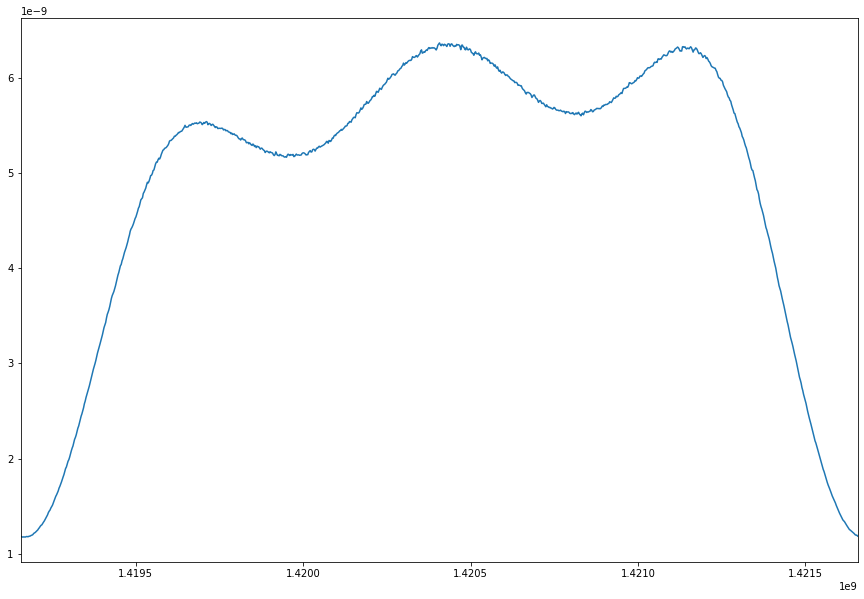

In [15]:
# I can do better than this - how about plotting hot and ref together?
dfhot_series.plot(figsize=(15,10))
plt.show()

In [16]:
# Oooooooooooooowahhhhhhhhhh!!